In [1]:
!pip install pycaret

     |████████████████████████████████| 194kB 3.4MB/s 
     |████████████████████████████████| 1.2MB 10.4MB/s 
     |████████████████████████████████| 63.9MB 98kB/s 
     |████████████████████████████████| 1.6MB 27.8MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 7.0MB 19.8MB/s 
     |████████████████████████████████| 3.1MB 40.6MB/s 
     |████████████████████████████████| 133kB 54.1MB/s 
     |████████████████████████████████| 266kB 48.0MB/s 
     |████████████████████████████████| 389kB 46.8MB/s 
     |████████████████████████████████| 552kB 38.8MB/s 
     |████████████████████████████████| 2.1MB 42.7MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 235kB 52.9MB/s 
     |████████████████████████████████| 6.2MB 42.1MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
 

In [3]:
from pycaret.utils import version
version()

1.0.0


In [0]:
from pycaret.datasets import get_data

In [6]:
data=get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


So from the above datasets we have to predict the price of the diamonds
based on this attributes.

In [0]:
from pycaret.regression import*

In [8]:
algo=setup(data=data,target='Price')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4095
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(6000, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


High cardinality means data contain large number of unique value.
Low cardinality means the data contain less number of the unique value may be lots of repeation are there.


In [9]:
compare_models(blacklist=['tr','catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest,719.148000,2149566.245200,1451.810000,0.977500,0.077700,0.057600
1,Extra Trees Regressor,739.809800,2221335.275800,1461.662200,0.977200,0.079900,0.059500
2,Light Gradient Boosting Machine,709.348200,2356664.947400,1506.916300,0.976000,0.074100,0.054600
3,Gradient Boosting Regressor,872.840800,2876127.844000,1682.973800,0.969800,0.100500,0.075600
4,Extreme Gradient Boosting,883.943500,2915135.672100,1696.384900,0.969400,0.103100,0.077900
5,Decision Tree,910.572100,3110161.916500,1746.285700,0.967200,0.100900,0.073500
6,Least Angle Regression,2337.169800,13052826.251200,3563.217800,0.866600,0.625900,0.277500
7,Lasso Regression,2334.807400,13058822.220300,3564.578600,0.866500,0.621400,0.276900
8,Lasso Least Angle Regression,2278.266400,13098501.116700,3566.176000,0.866500,0.627700,0.262900
9,Bayesian Ridge,2336.287800,13058902.855200,3564.786100,0.866500,0.630900,0.277200


Now we will see which will have highest R2 value that model will be selected

In [10]:
model1=create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2409.8429,1.111860e+07,3334.4571,0.8717,0.8390,0.2895
1,2117.0531,8.648226e+06,2940.7866,0.8851,0.6138,0.2677
2,2608.0500,2.183356e+07,4672.6396,0.8289,0.6179,0.2673
3,2062.4716,8.765548e+06,2960.6668,0.8860,0.6310,0.2649
4,2324.0476,1.116919e+07,3342.0336,0.8561,0.6433,0.3124
5,2263.6693,1.051675e+07,3242.9539,0.8733,0.7506,0.2920
6,2543.3929,2.014176e+07,4487.9577,0.8403,0.5918,0.2879
7,2425.6476,1.291543e+07,3593.8046,0.8682,0.6567,0.2837
8,2521.0048,1.633087e+07,4041.1470,0.8506,0.5227,0.2744
9,2162.4749,9.416512e+06,3068.6336,0.9019,0.5353,0.2491


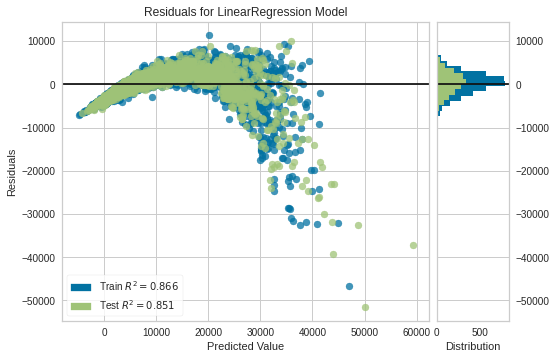

In [11]:
plot_model(model1)

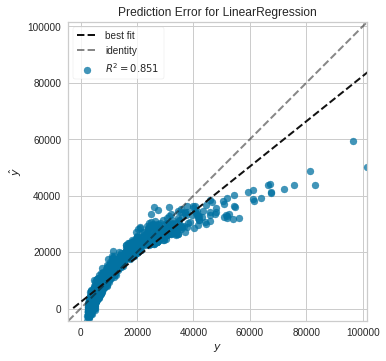

In [12]:
plot_model(model1,plot='error')

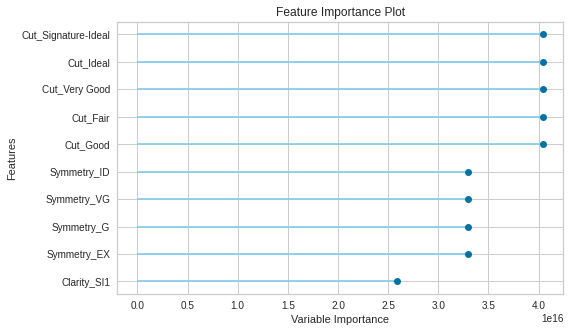

In [14]:
plot_model(model1,plot='feature')

So from the above graph we see the independent features are not have linear relationship with the target . so we need to preprocess the data.

#Data Preprocessing


In [15]:
algo_final=setup(data=data,target='Price',transform_target=True,bin_numeric_features=['Carat Weight'],remove_multicollinearity=True,feature_interaction=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3382
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(6000, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [16]:
model2=create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1116.2013,5.710717e+06,2389.7107,0.9488,0.1088,0.0866
1,915.9134,2.054974e+06,1433.5179,0.9709,0.1134,0.0880
2,964.9514,3.113857e+06,1764.6123,0.9653,0.1129,0.0858
3,1079.1549,5.462067e+06,2337.1066,0.9458,0.1265,0.0964
4,1084.1058,5.886030e+06,2426.1142,0.9513,0.1196,0.0860
5,866.6470,2.531897e+06,1591.1934,0.9710,0.1068,0.0786
6,1157.7947,3.756689e+06,1938.2180,0.9646,0.1205,0.0944
7,1202.9402,1.357735e+07,3684.7456,0.8968,0.1204,0.0872
8,984.0949,3.027901e+06,1740.0866,0.9684,0.1153,0.0863
9,1062.8607,4.484538e+06,2117.6727,0.9658,0.1092,0.0841


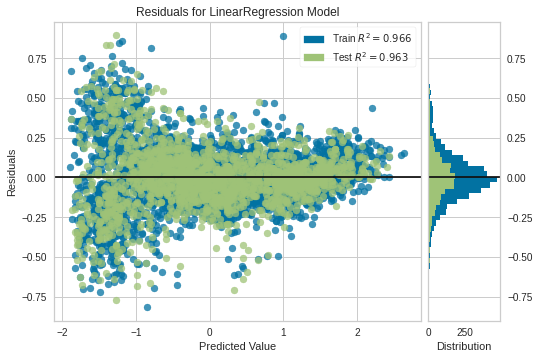

In [17]:
plot_model(model2)

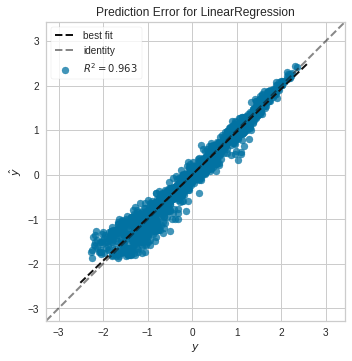

In [18]:
plot_model(model2,plot='error')

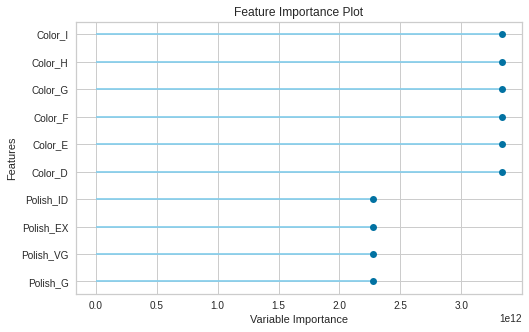

In [19]:
plot_model(model2,plot='feature')

Now the data is transformed well now the features having linear relationship with the target

In [0]:
prediction=predict_model(model2,data=data)

In [21]:
prediction

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,5633.9885
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,3655.7322
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3378.0236
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,3813.4682
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3510.0979
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6501.8308
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,5886.8755
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,6501.8308
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,10912.3104


In [0]:

final_model=finalize_model(model2)

In [24]:
final_model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
final_pred=predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,944.3578,2.832947e+06,1683.1361,0.9719,0.1158,0.087


In [27]:
save_model(final_pred,'reg model')

Transformation Pipeline and Model Succesfully Saved


In [28]:
load=load_model('reg model')

Transformation Pipeline and Model Sucessfully Loaded
